In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

dataset:- 

In [511]:
df = pd.read_csv("../../../Datasets/laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.shape

(1303, 12)

In [9]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### Observation:

As here we see that:

1. **ScreenResolution:** Currently it has three types of information, screen size and display quality and touchscreen or not.
2. **CPU:** Same here also we get two types of information, processor and speed.
3. **RAM:** Here we remove the GB word from last and make it to int64 because in today's world 99% of laptops have RAM in GB's.
4. **Weight:** Here also we remove kg to make it float64.
5. **Memory** Here we get 4 information i.e, HDD,SSD,Flash storage,Hybrid.

## 🛠️ Preprocessing

Handle Ram and Weight column

In [512]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df['Ram'] = df['Ram'].str.replace('GB','',)
df['Weight'] = df['Weight'].str.replace('kg','',)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [513]:
df['Ram'] = df['Ram'].astype('int64')
df['Weight'] = df['Weight'].astype('float64')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS panel         1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


## ⚙️ Feature engineering:- 

In [363]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [362]:
df.duplicated().sum()

29

Handle Screen Resolution column

In [514]:
df['IPS panel']= df['ScreenResolution'].apply(lambda x:1 if "IPS" in x else 0)

In [515]:
df['Touchscreen']= df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)

In [516]:
temp_df = df['ScreenResolution'].str.split('x',n= 1,expand=True)
temp_df

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [517]:
df['X_res'] = temp_df[0]
df['Y_res'] = temp_df[1]

In [518]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [519]:
df['X_res']= df['X_res'].astype('int64')
df['Y_res']= df['Y_res'].astype('int64')

In [520]:
df['ppi'] = ((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches'].astype('float')

Formula of ppi:- $ \sqrt{\frac{(X resolution^2) + (Y resolution^2)}{Inch} } $

In [535]:
df.drop(columns='ScreenResolution',inplace=True)
df.drop(columns='Inches',inplace=True)
df.drop(columns='X_res',inplace=True)
df.drop(columns='Y_res',inplace=True)
df.drop(columns='Processor',inplace=True)
df.drop(columns='Cpu',inplace=True)

Handle CPU column

In [521]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [522]:
df['Processor'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [523]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS panel,Touchscreen,X_res,Y_res,ppi,Processor
733,Acer,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.40,29783.520,0,0,1366,768,100.454670,Intel Core i5
963,Toshiba,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.10,95371.200,0,1,1920,1080,176.232574,Intel Core i7
553,HP,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.65,28992.312,0,0,1600,900,106.113062,Intel Core i3
1193,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.1GHz,8,256GB Flash Storage,Intel HD Graphics 5300,Mac OS X,0.92,61964.640,1,0,2304,1440,226.415547,Intel Core M
1187,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.23,36816.480,0,0,1920,1080,141.211998,Intel Core i5


## 🔭 EDA:- 

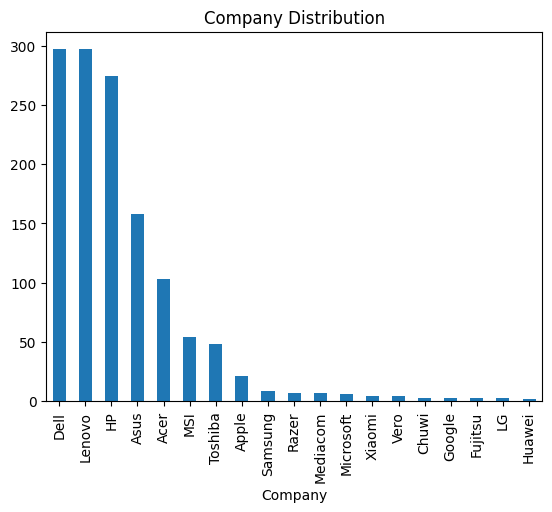

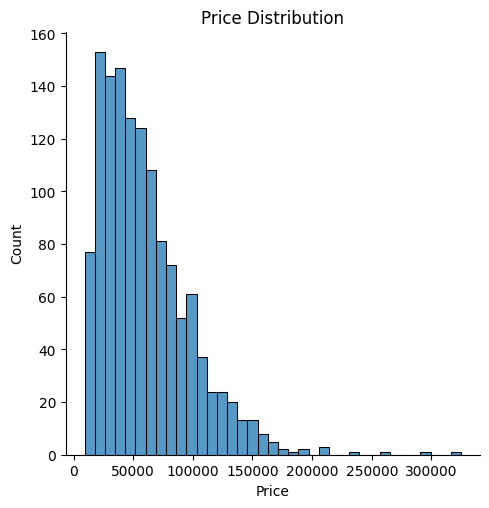

In [72]:
df['Company'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Company Distribution')

sns.displot(df['Price'])
plt.title('Price Distribution')
plt.show()

observation: Both price and company are skewed data

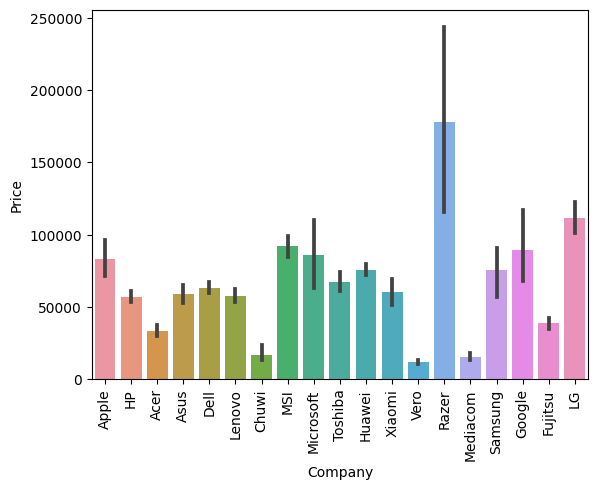

In [76]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='TypeName'>

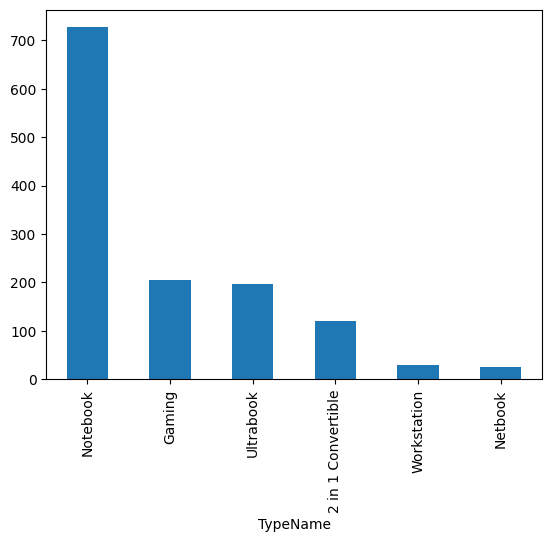

In [77]:
df['TypeName'].value_counts().plot(kind='bar')

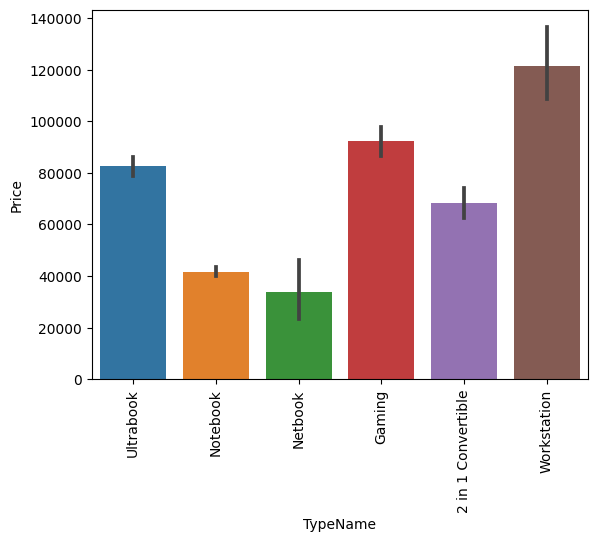

In [78]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

observation: There is a coorelation between Type and Price.

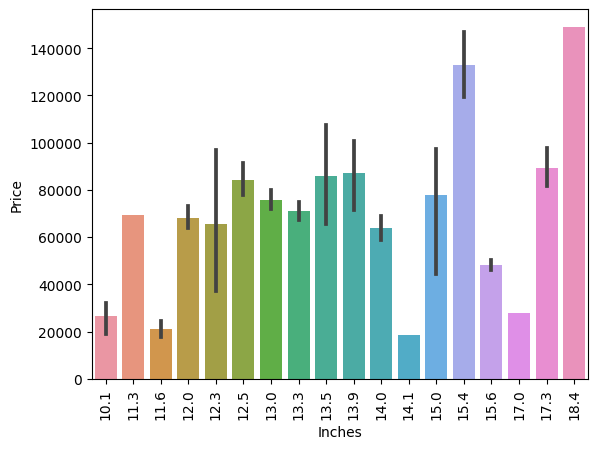

In [81]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

observation: There is no such a coorelation between price and screen size.

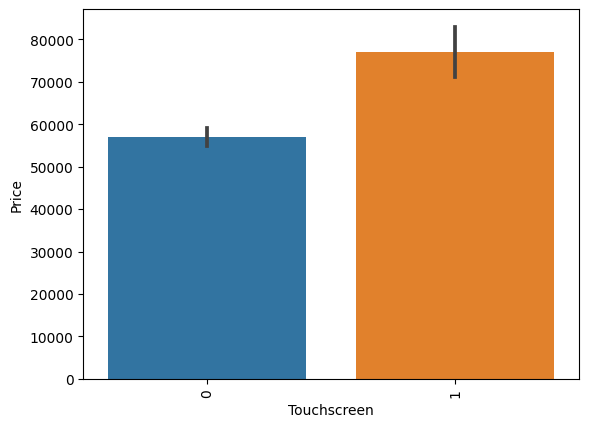

In [88]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

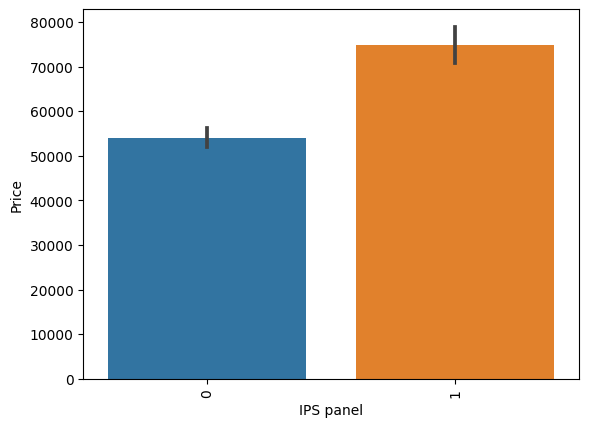

In [94]:
sns.barplot(x=df['IPS panel'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [153]:
df.corr(numeric_only=True)['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
IPS panel      0.252208
Touchscreen    0.191226
ppi            0.473487
Name: Price, dtype: float64

observation: As here we can see Price coorelations with different parameters

In [524]:
def fetch_processor(text):

  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  elif text.split()[0] == "Intel":
    return "Other Intel processor"
  else:
    return "AMD processor"

In [525]:
df['Cpu brand'] = df['Processor'].apply(fetch_processor)

<Axes: xlabel='Cpu brand'>

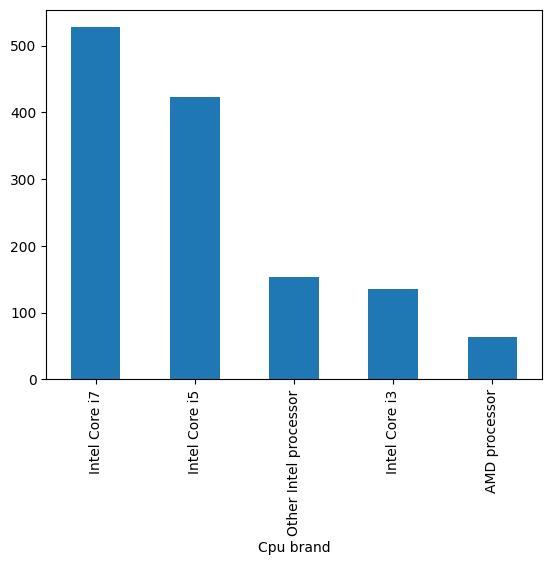

In [526]:
df['Cpu brand'].value_counts().plot(kind='bar')

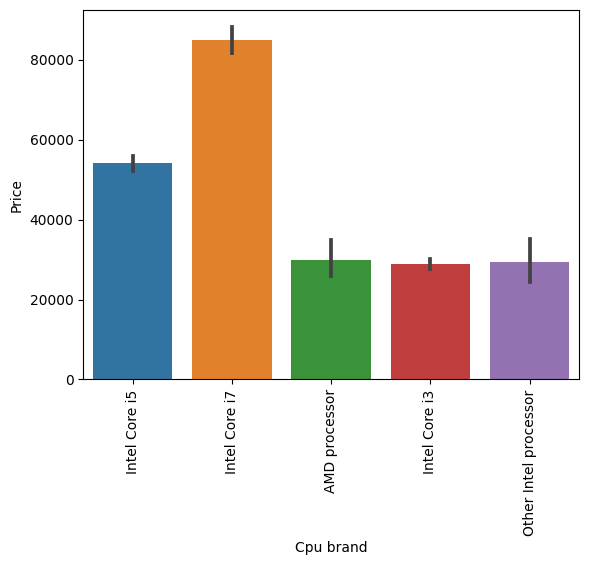

In [527]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

Memory

In [528]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"][0]
df["second"] = df["second"][0]

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])
df["HDD"] = pd.to_numeric(df["HDD"].str.replace('SSD', '', regex=True), errors='coerce')
df["SSD"] = pd.to_numeric(df["SSD"].str.replace('SSD', '', regex=True), errors='coerce')
df["Hybrid"] = pd.to_numeric(df["Hybrid"].str.replace('SSD', '', regex=True), errors='coerce')
df["Flash_Storage"] = pd.to_numeric(df["Flash_Storage"].str.replace('SSD', '', regex=True), errors='coerce')

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [320]:
df.drop(columns=['HDD', 'SSD','Hybrid', 'Flash_Storage'],inplace=True)

In [529]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'IPS panel', 'Touchscreen',
       'X_res', 'Y_res', 'ppi', 'Processor', 'Cpu brand', 'HDD', 'SSD',
       'Hybrid', 'Flash_Storage'],
      dtype='object')

In [530]:
df.drop(columns=['Memory'],inplace=True)

In [536]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,IPS panel,Touchscreen,ppi,Cpu brand,HDD,SSD
1139,HP,Ultrabook,8,Intel HD Graphics 520,Windows 7,1.88,115709.2416,0,0,141.211998,Intel Core i7,0.0,128.0
842,HP,Notebook,8,Nvidia GeForce 930MX,Windows 10,2.63,48484.8000,0,0,106.113062,Intel Core i5,128.0,0.0
33,Dell,Ultrabook,16,Intel UHD Graphics 620,Windows 10,1.20,99580.3200,0,1,276.053530,Intel Core i7,0.0,128.0
144,HP,Notebook,4,AMD Radeon R4 Graphics,Windows 10,1.86,19660.3200,0,0,100.454670,AMD processor,0.0,128.0
786,MSI,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,2.20,58021.9200,0,0,141.211998,Intel Core i5,0.0,128.0


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
 12  HDD               1303 non-null   float64
 13  SSD               1303 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 142.6+ KB


In [532]:
df['SSD'].fillna(0,inplace=True)
df['HDD'].fillna(0,inplace=True)

In [537]:
df.corr(numeric_only=True)['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
IPS panel      0.252208
Touchscreen    0.191226
ppi            0.473487
HDD           -0.425241
SSD            0.509880
Name: Price, dtype: float64

In [539]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

Gpu

In [540]:
df['Gpu brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [541]:
df.drop(columns=['Gpu'],inplace=True)

In [542]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,IPS panel,Touchscreen,ppi,Cpu brand,HDD,SSD,Gpu brand
1218,Lenovo,Gaming,8,Windows 10,2.60,67772.1600,1,0,141.211998,Intel Core i7,0.0,128.0,Nvidia
597,Lenovo,Notebook,8,Windows 10,1.70,78534.7200,1,0,157.350512,Intel Core i5,0.0,128.0,Intel
1048,Lenovo,Gaming,16,Windows 10,4.60,122010.6672,1,0,127.335675,Intel Core i7,0.0,128.0,Nvidia
1252,Lenovo,Notebook,6,Windows 10,2.40,30316.3200,0,0,141.211998,Intel Core i3,0.0,128.0,Nvidia
692,HP,Workstation,8,Windows 10,3.14,101657.7072,0,0,127.335675,Intel Core i7,128.0,0.0,Nvidia


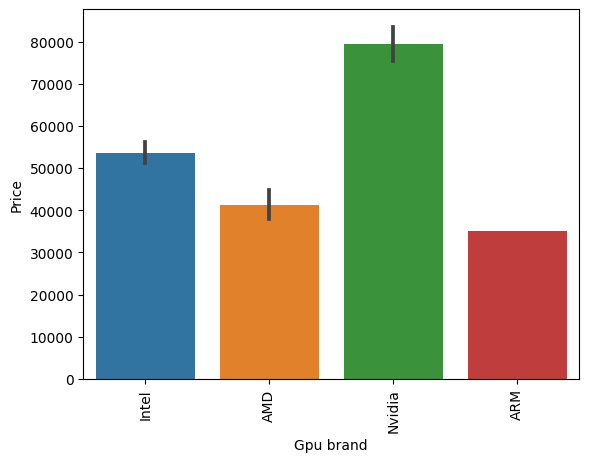

In [543]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

Operating System

In [544]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

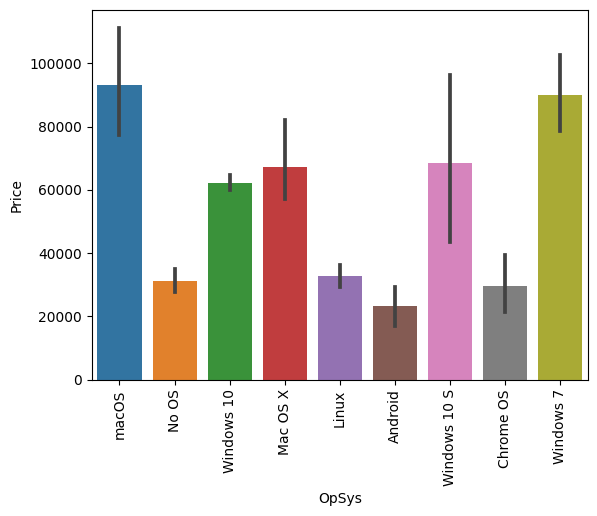

In [545]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [546]:
def cat_os(input):
    if input == 'Windows 10' or input == 'Windows 7' or input == 'Windows 10 S':
        return "Windows"
    elif input == 'macOS' or input == 'Mac OS X':
        return "MacOs"
    else:
       return "Linux/Chrome/Android/Other"

In [547]:
df['os'] = df['OpSys'].apply(cat_os)

In [548]:
df.drop(columns=['OpSys'],inplace=True)

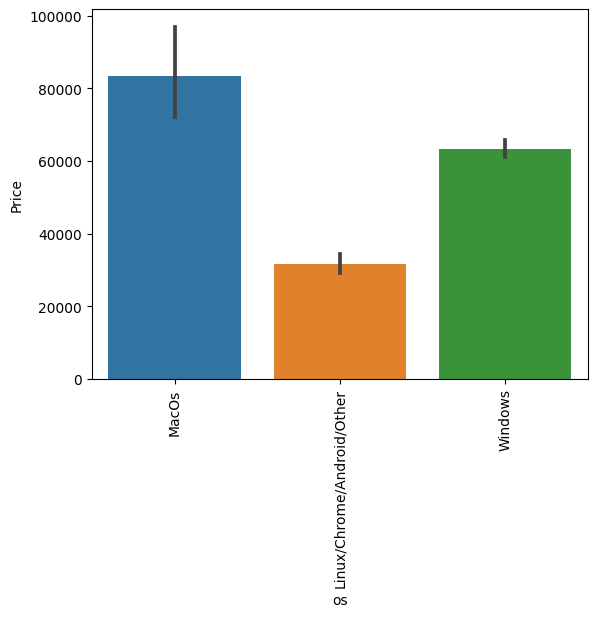

In [549]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [550]:
df.head()

,Company,TypeName,Ram,Weight,Price,IPS panel,Touchscreen,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,1,0,226.983005,Intel Core i5,0.0,128.0,Intel,MacOs
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,MacOs
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,128.0,Intel,Linux/Chrome/Android/Other
3,Apple,Ultrabook,16,1.83,135195.3360,1,0,220.534624,Intel Core i7,0.0,128.0,AMD,MacOs
4,Apple,Ultrabook,8,1.37,96095.8080,1,0,226.983005,Intel Core i5,0.0,128.0,Intel,MacOs


weight

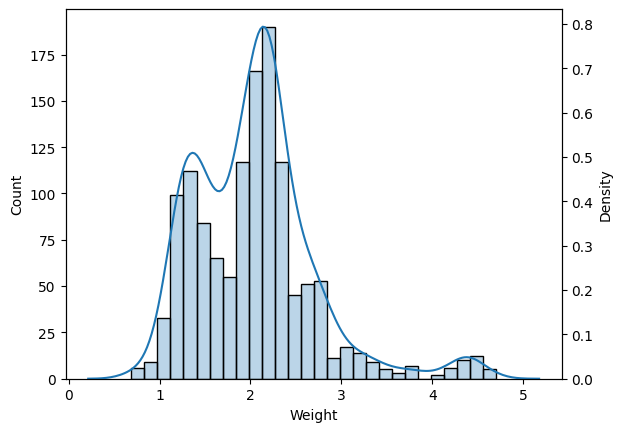

In [551]:
ax_hist = sns.histplot(df['Weight'], alpha=0.3)
ax_kde = ax_hist.twinx()
sns.kdeplot(df['Weight'], ax=ax_kde)
plt.show()

Coorelation

In [552]:
df.corr(numeric_only=True)

,Ram,Weight,Price,IPS panel,Touchscreen,ppi,HDD,SSD
Ram,1.000000,0.383874,0.743007,0.206623,0.116984,0.303763,-0.317405,0.388277
Weight,0.383874,1.000000,0.210370,0.016967,-0.294620,-0.323240,0.166620,-0.037748
Price,0.743007,0.210370,1.000000,0.252208,0.191226,0.473487,-0.425241,0.509880
IPS panel,0.206623,0.016967,0.252208,1.000000,0.150512,0.300879,-0.229569,0.228339
Touchscreen,0.116984,-0.294620,0.191226,0.150512,1.000000,0.460587,-0.158471,0.146372
ppi,0.303763,-0.323240,0.473487,0.300879,0.460587,1.000000,-0.402580,0.377297
HDD,-0.317405,0.166620,-0.425241,-0.229569,-0.158471,-0.402580,1.000000,-0.853198
SSD,0.388277,-0.037748,0.509880,0.228339,0.146372,0.377297,-0.853198,1.000000


<Axes: >

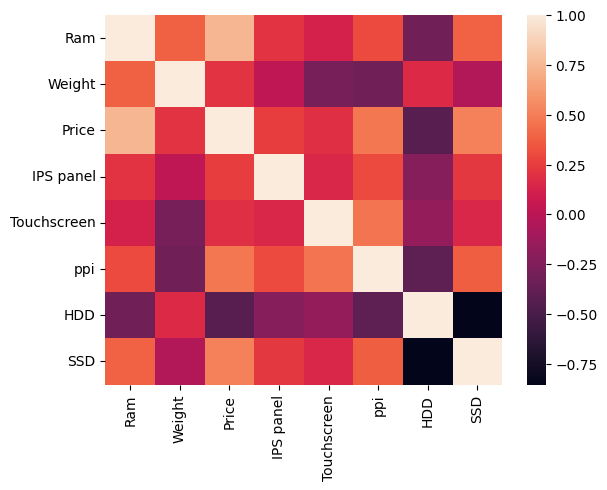

In [553]:
sns.heatmap(df.corr(numeric_only=True))

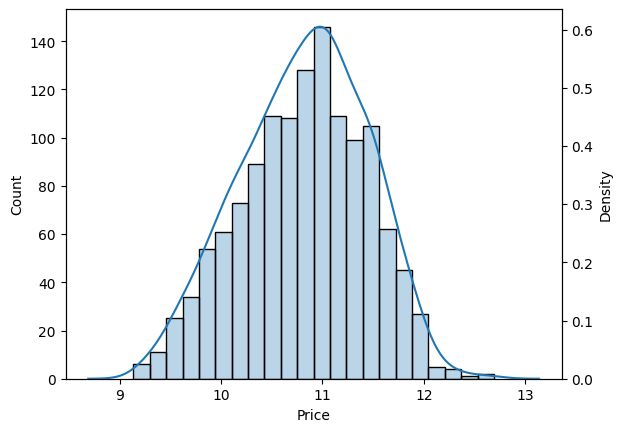

In [554]:
ax_hist = sns.histplot(np.log(df['Price']), alpha=0.3)
ax_kde = ax_hist.twinx()
sns.kdeplot(np.log(df['Price']), ax=ax_kde)
plt.show()

In [555]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [563]:
X

,Company,TypeName,Ram,Weight,IPS panel,Touchscreen,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,1,0,226.983005,Intel Core i5,0.0,128.0,Intel,MacOs
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,MacOs
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0.0,128.0,Intel,Linux/Chrome/Android/Other
3,Apple,Ultrabook,16,1.83,1,0,220.534624,Intel Core i7,0.0,128.0,AMD,MacOs
4,Apple,Ultrabook,8,1.37,1,0,226.983005,Intel Core i5,0.0,128.0,Intel,MacOs
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0.0,128.0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0.0,128.0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel processor,0.0,0.0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,128.0,0.0,AMD,Windows


In [566]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.32,random_state=2)

In [567]:
X_train

,Company,TypeName,Ram,Weight,IPS panel,Touchscreen,ppi,Cpu brand,HDD,SSD,Gpu brand,os
511,Acer,Notebook,4,2.20,0,0,141.211998,Intel Core i7,128.0,0.0,Nvidia,Windows
82,HP,Notebook,8,1.63,0,0,157.350512,Intel Core i5,0.0,128.0,Intel,Windows
414,Asus,2 in 1 Convertible,8,1.27,1,1,165.632118,Intel Core i5,0.0,128.0,Intel,Windows
455,Dell,2 in 1 Convertible,4,1.47,0,1,135.094211,Other Intel processor,128.0,0.0,Intel,Windows
678,LG,Ultrabook,8,1.09,1,0,141.211998,Intel Core i7,0.0,128.0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,128.0,0.0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0.0,128.0,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD processor,128.0,0.0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,128.0,0.0,Nvidia,Linux/Chrome/Android/Other


In [568]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [570]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Linear Regression

In [589]:
Step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder = 'passthrough')
Step2 = LinearRegression()
pipe = Pipeline(
    [
        ('step1',Step1),
        ('step2',Step2)
    ]
)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("R2 score:",r2_score(y_test,y_pred)*100)
print("MAE:",mean_absolute_error(y_test,y_pred))

R2 score: 80.26630620474694
MAE: 0.20726253804380157


### Rigid Regression

In [590]:
Step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder = 'passthrough')
Step2 = Ridge(alpha=10)
pipe = Pipeline(
    [
        ('step1',Step1),
        ('step2',Step2)
    ]
)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred)*100)
print("MAE:",mean_absolute_error(y_test,y_pred))

R2 score: 80.55132942926204
MAE: 0.20648988279268116


### Lasso Regression

In [591]:
Step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder = 'passthrough')
Step2 = Lasso(alpha=0.001)
pipe = Pipeline(
    [
        ('step1',Step1),
        ('step2',Step2)
    ]
)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred)*100)
print("MAE:",mean_absolute_error(y_test,y_pred))

R2 score: 80.66941279929601
MAE: 0.2056965190988623


### KNN

In [592]:
Step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])],remainder = 'passthrough')
Step2 = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline(
    [
        ('step1',Step1),
        ('step2',Step2)
    ]
)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred)*100)
print("MAE:",mean_absolute_error(y_test,y_pred))

R2 score: 72.87754279254193
MAE: 0.21030658050628312


### Decision Tree

In [595]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7730341453583562
MAE 0.2066557784021781


### SVM

In [596]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8486625457080661
MAE 0.17930327111762237


### Random Forest

In [597]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8701005240005097
MAE 0.16350508630405164


### Extra Trees

In [599]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8580281913793959
MAE 0.16908228123270944


### AdaBoost

In [600]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7773107767807096
MAE 0.22562059320134753


### Gradient Boost

In [601]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.879293902756753
MAE 0.1588986091460628


### XgBoost

In [602]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8747645897184608
MAE 0.16190089028837754


## Export Model

In [603]:
import pickle

In [605]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))